In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
df = pd.read_csv("temperatures.csv")
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [42]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [43]:
df=df.drop(['YEAR',"ANNUAL"],axis=1)
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,23.27,31.46,31.27,27.25
1,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,25.75,31.76,31.09,26.49
2,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,24.24,30.71,30.92,26.26
3,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,23.62,30.95,30.66,26.40
4,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,25.58,32.58,31.33,27.83
113,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,24.90,31.82,32.00,27.81
114,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,25.74,31.68,31.87,28.27
115,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,28.33,34.57,32.28,30.03


In [44]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled

array([[-1.54923614, -1.27232246, -0.01502329, ..., -0.07812011,
         0.17146803,  0.06258973],
       [ 1.49523966,  0.8571412 ,  0.6429485 , ...,  0.32870718,
        -0.25842682, -1.07322219],
       [-0.29775202, -0.49559187, -1.18057331, ..., -1.09518835,
        -0.66443863, -1.41695475],
       ...,
       [ 1.07406712,  1.12768781, -0.01502329, ...,  0.2202199 ,
         1.60445088,  1.58696888],
       [ 3.9139734 ,  3.59751657,  3.32183363, ...,  4.13932285,
         2.58365582,  4.21727017],
       [ 3.32433184,  3.37060651,  2.36307474, ...,  3.54264282,
         2.89413544,  3.70914378]])

In [45]:
monthly_data = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

pca = PCA(n_components=1)
pca_col = pca.fit_transform(monthly_data)
df['PCA_Monthly'] = pca_col

correlation_matrix = df[['PCA_Monthly', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']].corr()
highest_correlation = correlation_matrix['PCA_Monthly'].drop('PCA_Monthly').idxmax()
highest_correlation

'JAN-FEB'

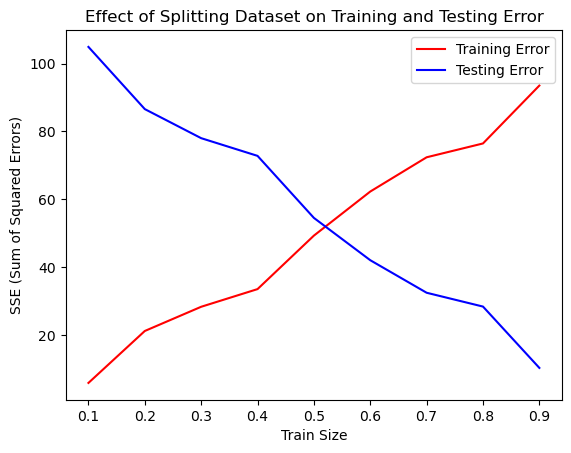

In [51]:
x = df[['JAN-FEB']].values
y = df[['PCA_Monthly']].values

train_sse = []
test_sse = [] 
train_sizes = []

tr_size = 0.1

while tr_size<=0.9:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=tr_size, random_state=42)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    tr_sse = np.sum((pred_train - y_train)**2)
    te_sse = np.sum((pred_test - y_test)**2)
    
    train_sse.append(tr_sse)
    test_sse.append(te_sse)
    train_sizes.append(tr_size)
    
    tr_size+=0.1

plt.title("Effect of Splitting Dataset on Training and Testing Error")
plt.plot(train_sizes, np.array(train_sse), c='r', label="Training Error")
plt.plot(train_sizes, np.array(test_sse), c='b', label="Testing Error")
plt.xlabel("Train Size")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.legend()
plt.show()

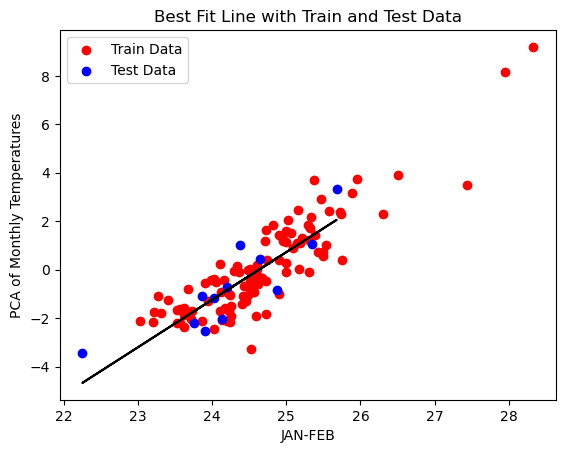

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9, random_state=42)

lr = LinearRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

plt.scatter(x_train,y_train,c='r',label='Train Data')
plt.scatter(x_test,y_test,c='b',label='Test Data')
plt.plot(x_test,pred_test,c='black')
plt.xlabel("JAN-FEB")
plt.ylabel("PCA of Monthly Temperatures")
plt.title("Best Fit Line with Train and Test Data")
plt.legend()

In [48]:
mse = mean_squared_error(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print("MSE",mse)
print("MAE",mae)
print("R2",r2)

MSE 0.8593701570239586
MAE 0.7788494666468404
R2 0.7353457672409178
